skin depth =  524.4232466841979  m
dx =  66.66666666666667 m and dy =  66.66666666666667 m and dt =  0.015432098765432105 h and nt =  15551  and overpressure estimation at  0 m from the injection
For a monopole :
injection point :  10000 10000
[time step 15551] Center at P=93.18 Pa at t=239.98 h, 10.00 days
Minimum activation pressure egal to  -229.25458123343458  bars
[time step 15551] Center at P=0.00 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=15.53 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=31.06 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=46.59 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=62.12 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=77.65 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=108.71 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=124.24 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=139.77 Pa at t=239.98 h, 10.00 days
[time step 15551] Center at P=155.31 Pa a

C:\Users\bvallier\AppData\Local\Temp\ipykernel_13900\2758906477.py:268: RuntimeWarning: invalid value encountered in double_scalars
  ratioP=[max(P0211)/max(P0221),max(P01214)/max(P01224),max(P02212)/max(P02222),max(P03213)/max(P03223),max(P04214)/max(P04224),max(P05215)/max(P05225),max(P21)/max(P22),max(P211)/max(P221),max(P212)/max(P222),max(P213)/max(P223),max(P214)/max(P224),max(P215)/max(P225)]
C:\Users\bvallier\AppData\Local\Temp\ipykernel_13900\2758906477.py:272: RuntimeWarning: invalid value encountered in double_scalars
  ratioP01=[max(P0211)/max(P0251),max(P01214)/max(P01254),max(P02212)/max(P02252),max(P03213)/max(P03253),max(P04214)/max(P04254),max(P05215)/max(P05255),max(P21)/max(P25),max(P211)/max(P251),max(P212)/max(P252),max(P213)/max(P253),max(P214)/max(P254),max(P215)/max(P255)]
C:\Users\bvallier\AppData\Local\Temp\ipykernel_13900\2758906477.py:273: RuntimeWarning: invalid value encountered in double_scalars
  ratioP008=[max(P0211)/max(P0241),max(P01214)/max(P01244),m

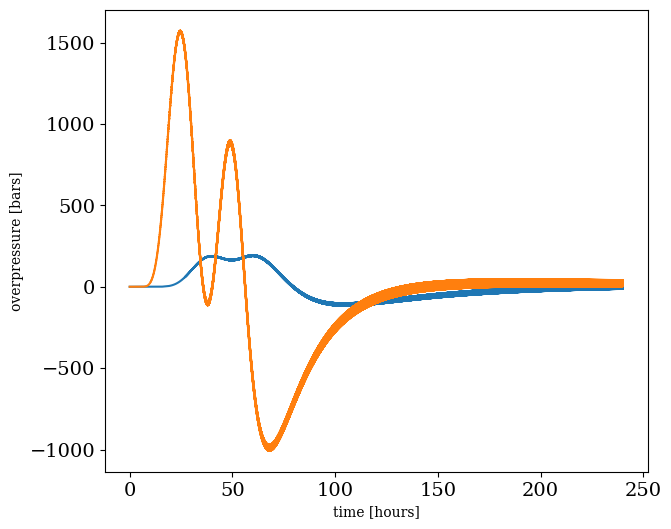

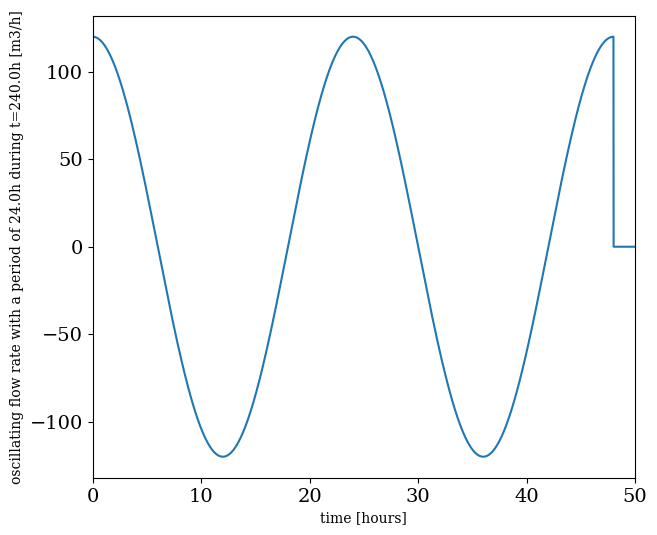

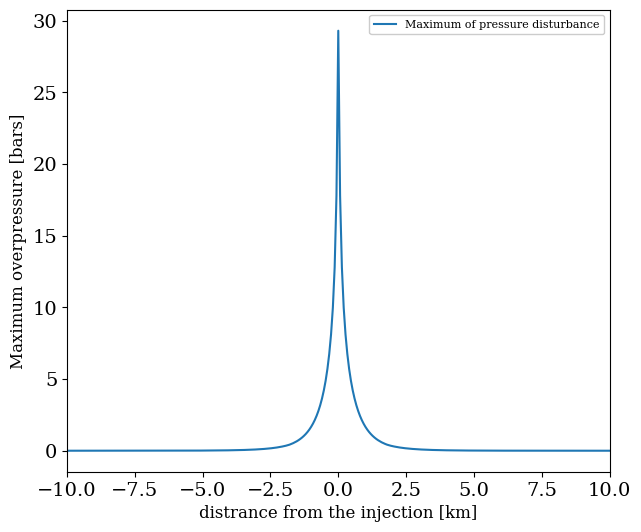

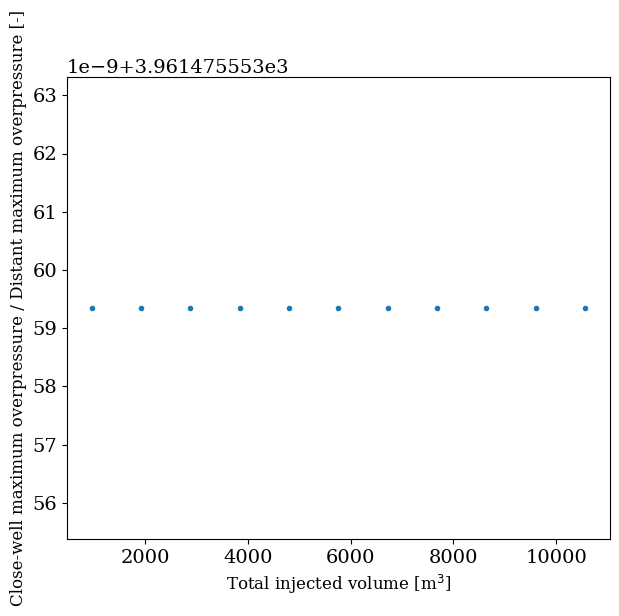

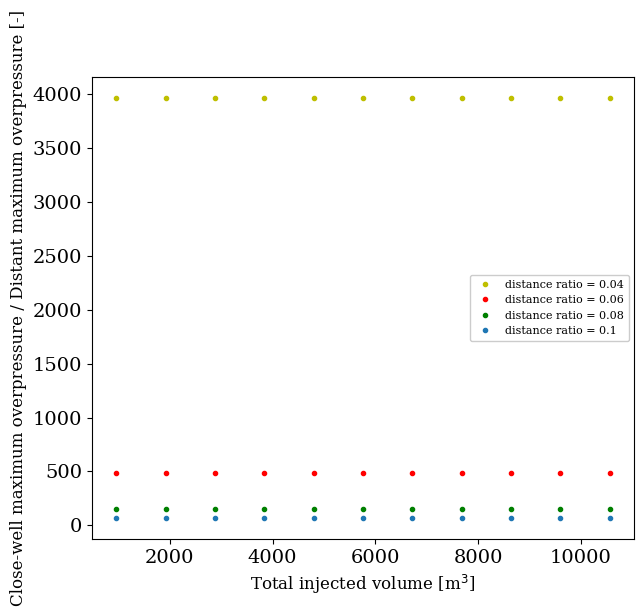

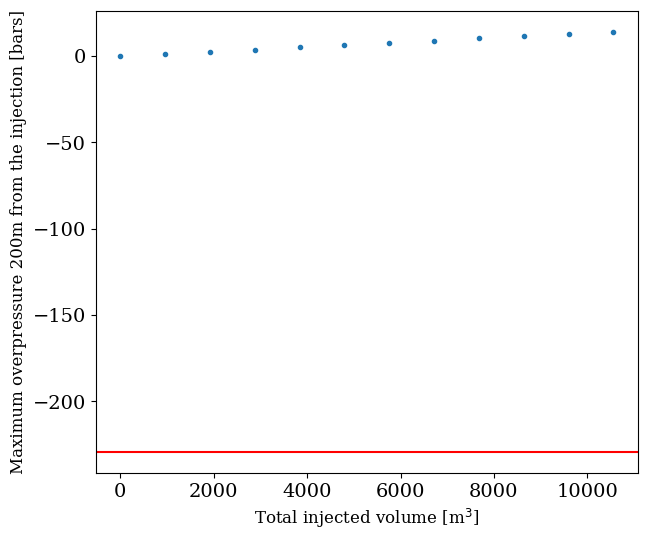

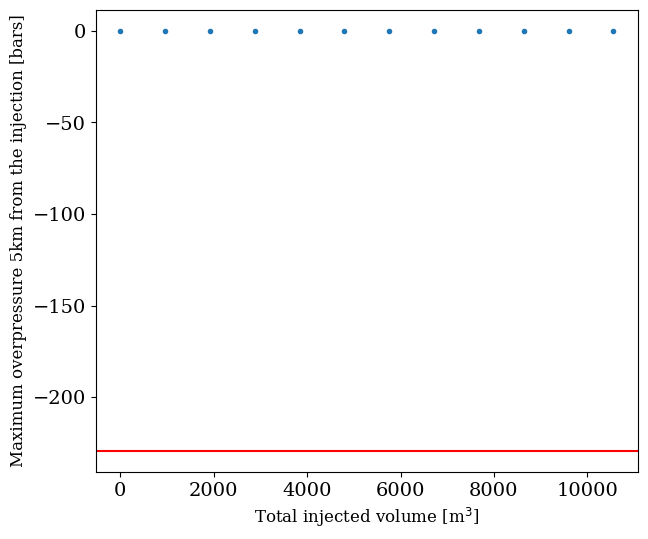

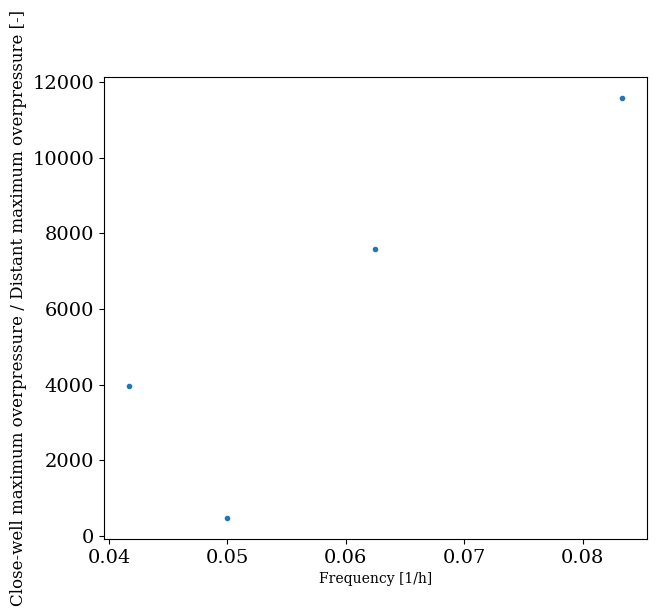

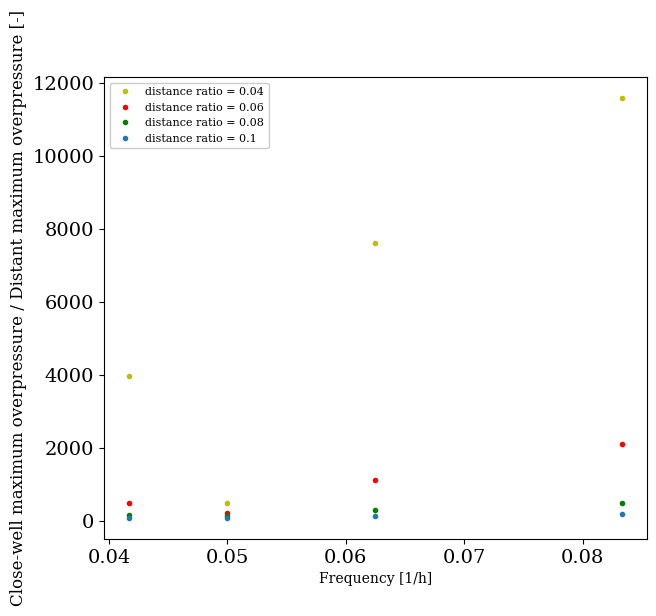

In [2]:
# Oscillating injection in 2D

import numpy
import math
from matplotlib import pyplot
from matplotlib.pyplot import cm
import matplotlib.animation as animation
%matplotlib inline
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

def ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi,h):
    
    # Define some constants 
    sigma_x = D * dt / dx**2     
    sigma_y = D * dt / dy**2     
    # Integrate in time.
    P = P0.copy()
    # Estimate number of grid points in x- and y-direction
    ny, nx = P.shape
    Pcenterline = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterline1 = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterline2 = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    Pcenterlinec = 0.0 * numpy.ones((nx, nt),dtype='uint8')
    P1 = numpy.linspace(0.0, 0.0, num=nt)
    P2 = numpy.linspace(0.0, 0.0, num=nt)
    P21 = numpy.linspace(0.0, 0.0, num=nt)
    P22 = numpy.linspace(0.0, 0.0, num=nt) 
    P23 = numpy.linspace(0.0, 0.0, num=nt)
    P24 = numpy.linspace(0.0, 0.0, num=nt) 
    P25 = numpy.linspace(0.0, 0.0, num=nt) 
    P3 = numpy.linspace(0.0, 0.0, num=nt) # for the production center
    s1=numpy.linspace(0.,0., num=nt) # in m^3/h/dx^2 # Define the source for the injection point
    s2=numpy.linspace(0.,0., num=nt) # monopole 
    Pglob = 0.0 * numpy.ones((ny, nx, nt),dtype='uint8')
    # Indices of the model center
    I, J = int(nx/ 2), int(ny/ 2) 
    # Time loop
    for n in range(nt):
        print(n, end='\r')
        # store old overpressure field 
        Pn = P.copy()      
        # loops over spatial grid    
        for i in range(1,nx-1):
            for j in range(1,ny-1):
                P[j,i]=(Pn[j, i]+sigma_x * (Pn[j, i+1] - 2.0 * Pn[j, i] + Pn[j, i-1])+sigma_y * (Pn[j+1, i] - 2.0 * Pn[j, i] + Pn[j-1, i]))
                if i==int(xinj/dx) and j==int(yinj/dy):
                    if n*dt <= tinj:
                        s1[n] = (Vi/(dx*dy*h))*(dt/tinj)*math.cos(w*n*dt) 
                        P[j,i] = P[j,i] + s1[n]/cphi 
                        P1[n] = P[j,i]                  
                    else: # constant injected volume Vi
                        s1[n]=0
                        P[j,i] = P[j,i] + s1[n]/cphi 
                        P1[n] = P[j,i] # pressure at the injection point                            
                if i==int(xob/dx) and j==int(yob/dy): # observation point   
                    P2[n] = P[j,i]
                if i==int(xob1/dx) and j==int(yob1/dy): # observation point   
                    P21[n] = P[j,i]
                if i==int(xob2/dx) and j==int(yob2/dy): # observation point   
                    P22[n] = P[j,i]
                if i==int(xob3/dx) and j==int(yob3/dy): # observation point   
                    P23[n] = P[j,i]
                if i==int(xob4/dx) and j==int(yob4/dy): # observation point   
                    P24[n] = P[j,i]
                if i==int(xob5/dx) and j==int(yob5/dy): # observation point   
                    P25[n] = P[j,i]
                if j==int(yob/dy) :  # observation profile
                    Pcenterline[i,n]=P[j,i]     
                if j==int(yob1/dy) :  # observation profile
                    Pcenterline1[i,n]=P[j,i]
                if j==int(yob2/dy) :  # observation profile
                    Pcenterline2[i,n]=P[j,i]      
        Pglob[:,:,n]=P[:,:]               
    print('[time step {}] Center at P={:.2f} Pa at t={:.2f} h, {:.2f} days'.format(n + 1, P[J, I], (n + 1) * dt, (n + 1) * dt / 24))   
    return P,P1,P2,P21,P22,P23,P24,P25,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob

# -----------------------------------------------------------------------------------------------------------------------------------------
# -----------------------------------------------------------------------------------------------------------------------------------------

## Main code where parameters are set.
Lx = 20000.  # length of the fault in the x direction in m
Ly = 20000. # height of the fault in the y direction in m
nx = 301 # number of points in the x direction
ny = 301 # number of points in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction
kappa = 1e-13 # permeability in m^2
compr = 5e-10 #water compressibility in 1/Pa
phi = 0.01 # porosity 
mu = 1e-3 # water dynamic viscosity in Pa.s
cphi = compr*phi #water compressibility times porosity in 1/Pa
D = kappa/(mu*cphi)*3600 # pressure diffusivity in m^2/h 
Qinj=120. #in m^3/h
h=70 # permeable zone thickness in m
## time, period, pulsation, volume parameters for the oscillating injection
tob=240 # observation time in h (here one month)
tinj=48 # time of the stabilisation of the injection in h
tp=1*24 # period of the oscillation
w=2*math.pi/tp # pulsation in 1/h
Vi=Qinj*tinj # injected volume in m^3
sd=(D/w)**0.5 # skin depth in m
print('skin depth = ',(D/w)**0.5,' m')
## space
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)
## observation points less and less close to the injection and production points
xinj=int(Lx/2) # injection point x for monopole
yinj=int(Ly/2) # injection point x for monopole
xob=xinj # obversation point x
yob=yinj # obversation point y
xob1=int(Lx/2+200) # obversation point x
yob1=int(Ly/2+200) # obversation point y
xob2=int(Lx/2+5000) # obversation point x
yob2=int(Ly/2+5000) # obversation point y
xob3=int(Lx/2+3333) # obversation point x
yob3=int(Ly/2+3333) # obversation point y
xob4=int(Lx/2+2500) # obversation point x
yob4=int(Ly/2+2500) # obversation point y
xob5=int(Lx/2+2000) # obversation point x
yob5=int(Ly/2+2000) # obversation point y

## Compute the initial temperature distribution.
Pb = 0.0  # temperature at the left and bottom boundaries
P0 = 0.0 * numpy.ones((ny, nx))
P0[0, :] = Pb
P0[:, 0] = Pb
## Set the time-step size based on CFL limit.
sigma = 0.25
dt = sigma * min(dx, dy)**2 / D  # time-step size
nt=int(tob/dt)
## time
t = numpy.linspace(0.0, tob, num=nt)
print('dx = ',dx,'m and dy = ',dy,'m and dt = ',dt,'h and nt = ',nt,' and overpressure estimation at ',xob-int(Lx/2),'m from the injection')

## MONOPOLE ------------------------------
## Define the locations along a gridline.
P1 = numpy.linspace(0.0, 0.0, num=nt)
P2 = numpy.linspace(0.0, 0.0, num=nt)
P3 = numpy.linspace(0.0, 0.0, num=nt)
Pcenterline=numpy.linspace(0.0, 0.0, num=nx)#0.0 * numpy.ones((nx, nt))

## Compute the pressure distribution with the finite difference method for a monopole
print('For a monopole :')
print('injection point : ',xinj,yinj)
P,P1,P2,P21,P22,P23,P24,P25,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi,h) 

## Calculation of Pmax ------------------------------------------------
# Pmax(r)
Pmax = numpy.linspace(0.0, 0.0, num=nx)
for i in range(nx):
    Pmax[i]=max(Pglob[int(yinj/dy),i,:])
# save Pmax=f(r)
with open('save_profiles/Pmax_r.dat', 'w') as f:
    for ip,p in enumerate(Pmax):
        f.write(str((x[ip]-int(Lx/2))/1000)+' '+str(p/1e5)+' \n')

# ----------- Other figures
Qinj0=0 #in m^3/h
Vi0=Qinj0*tinj
P,P01,P02,P0211,P0221,P0231,P0241,P0251,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi0,h)

Qinj01=20 #in m^3/h
Vi01=Qinj01*tinj
P,P011,P012,P01214,P01224,P01234,P01244,P01254,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi01,h)

Qinj02=40 #in m^3/h
Vi02=Qinj02*tinj
P,P021,P022,P02212,P02222,P02232,P02242,P02252,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi02,h)

Qinj03=60 #in m^3/h
Vi03=Qinj03*tinj
P,P031,P032,P03213,P03223,P03233,P03243,P03253,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi03,h)

Qinj04=80 #in m^3/h
Vi04=Qinj04*tinj
P,P041,P042,P04214,P04224,P04234,P04244,P04254,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi04,h)

Qinj05=100 #in m^3/h
Vi05=Qinj05*tinj
P,P051,P052,P05215,P05225,P05235,P05245,P05255,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi05,h)

# Other study cases
Qinj1=140 #in m^3/h
Vi1=Qinj1*tinj
P,P1,P2,P211,P221,P231,P241,P251,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi1,h) 

Qinj2=160 #in m^3/h
Vi2=Qinj2*tinj
P,P1,P2,P212,P222,P232,P242,P252,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi2,h) 

Qinj3=180 #in m^3/h
Vi3=Qinj3*tinj
P,P1,P2,P213,P223,P233,P243,P253,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi3,h)

Qinj4=200 #in m^3/h
Vi4=Qinj4*tinj
P,P1,P2,P214,P224,P234,P244,P254,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi4,h)

Qinj5=220 #in m^3/h
Vi5=Qinj5*tinj
P,P1,P2,P215,P225,P235,P245,P255,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w,Vi5,h)

w1=2*math.pi/20 # pulsation in 1/h
Pw,P1,P2,P211w,P221w,P231w,P241w,P251w,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w1,Vi,h) 

w2=2*math.pi/16
Pw,P1,P2,P212w,P222w,P232w,P242w,P252w,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w2,Vi,h) 

w3=2*math.pi/12
Pw,P1,P2,P213w,P223w,P233w,P243w,P253w,P3,Pcenterline,Pcenterline1,Pcenterline2,Pglob=ftcs2d(P0,nt,dt,dx,dy,D,cphi,xinj,yinj,xob,yob,xob1,yob1,xob2,yob2,xob3,yob3,xob4,yob4,xob5,yob5,tinj,w3,Vi,h) 

# Plot : (Pmax(r=200m)/Pmax(r=5km))=f(Vi)
ratioP=[max(P0211)/max(P0221),max(P01214)/max(P01224),max(P02212)/max(P02222),max(P03213)/max(P03223),max(P04214)/max(P04224),max(P05215)/max(P05225),max(P21)/max(P22),max(P211)/max(P221),max(P212)/max(P222),max(P213)/max(P223),max(P214)/max(P224),max(P215)/max(P225)]
maxPnear=[max(P0211)/1e5,max(P01214)/1e5,max(P02212)/1e5,max(P03213)/1e5,max(P04214)/1e5,max(P05215)/1e5,max(P21)/1e5,max(P211)/1e5,max(P212)/1e5,max(P213)/1e5,max(P214)/1e5,max(P215)/1e5]
maxPfar=[max(P0221)/1e5,max(P01224)/1e5,max(P02222)/1e5,max(P03223)/1e5,max(P04224)/1e5,max(P05225)/1e5,max(P22)/1e5,max(P221)/1e5,max(P222)/1e5,max(P223)/1e5,max(P224)/1e5,max(P225)/1e5]

ratioP01=[max(P0211)/max(P0251),max(P01214)/max(P01254),max(P02212)/max(P02252),max(P03213)/max(P03253),max(P04214)/max(P04254),max(P05215)/max(P05255),max(P21)/max(P25),max(P211)/max(P251),max(P212)/max(P252),max(P213)/max(P253),max(P214)/max(P254),max(P215)/max(P255)]
ratioP008=[max(P0211)/max(P0241),max(P01214)/max(P01244),max(P02212)/max(P02242),max(P03213)/max(P03243),max(P04214)/max(P04244),max(P05215)/max(P05245),max(P21)/max(P24),max(P211)/max(P241),max(P212)/max(P242),max(P213)/max(P243),max(P214)/max(P244),max(P215)/max(P245)]
ratioP006=[max(P0211)/max(P0231),max(P01214)/max(P01234),max(P02212)/max(P02232),max(P03213)/max(P03233),max(P04214)/max(P04234),max(P05215)/max(P05235),max(P21)/max(P23),max(P211)/max(P231),max(P212)/max(P232),max(P213)/max(P233),max(P214)/max(P234),max(P215)/max(P235)]
ratioP004=ratioP

assioV=[Qinj0*tinj,Qinj01*tinj,Qinj02*tinj,Qinj03*tinj,Qinj04*tinj,Qinj05*tinj,Qinj*tinj,Qinj1*tinj,Qinj2*tinj,Qinj3*tinj,Qinj4*tinj,Qinj5*tinj]


# Plot : (Pmax(r=200m)/Pmax(r=5km))=f(Vi) diff distance ratio
pyplot.figure(figsize=(7.0, 6.0))
pyplot.plot(assioV,ratioP004,'y.',label='distance ratio = 0.04')
pyplot.plot(assioV,ratioP006,'r.',label='distance ratio = 0.06')
pyplot.plot(assioV,ratioP008,'g.',label='distance ratio = 0.08')
pyplot.plot(assioV,ratioP01,'.',label='distance ratio = 0.1')
pyplot.ylabel('Close-well maximum overpressure / Distant maximum overpressure [-]',fontsize=12)
pyplot.xlabel('Total injected volume [m$^3$]',fontsize=12)
pyplot.legend(loc='best',framealpha=1,prop={'size':8.0})

# save Pmax_rclose/Pmax_rfar=f(Vi)
with open('save_profiles/taux_Pmax_vs_Vi_r_01.dat', 'w') as f:
    for ip,p in enumerate(ratioP01):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.08
with open('save_profiles/taux_Pmax_vs_Vi_r_008.dat', 'w') as f:
    for ip,p in enumerate(ratioP008):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.06
with open('save_profiles/taux_Pmax_vs_Vi_r_006.dat', 'w') as f:
    for ip,p in enumerate(ratioP006):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.04
with open('save_profiles/taux_Pmax_vs_Vi_r_004.dat', 'w') as f:
    for ip,p in enumerate(ratioP004):
        f.write(str(assioV[ip])+' '+str(p)+' \n')

ratioP=[max(P21)/max(P22),max(P211w)/max(P221w),max(P212w)/max(P222w),max(P213w)/max(P223w)]
maxPnear=[max(P21)/1e5,max(P211w)/1e5,max(P212w)/1e5,max(P213w)/1e5]
maxPfar=[max(P22)/1e5,max(P221w)/1e5,max(P222w)/1e5,max(P223w)/1e5]

assiofreq=[w/(2*math.pi),w1/(2*math.pi),w2/(2*math.pi),w3/(2*math.pi)]

ratioP01=[max(P21)/max(P25),max(P211w)/max(P251w),max(P212w)/max(P252w),max(P213w)/max(P253w)]
ratioP008=[max(P21)/max(P24),max(P211w)/max(P241w),max(P212w)/max(P242w),max(P213w)/max(P243w)]
ratioP006=[max(P21)/max(P23),max(P211w)/max(P231w),max(P212w)/max(P232w),max(P213w)/max(P233w)]
ratioP004=[max(P21)/max(P22),max(P211w)/max(P221w),max(P212w)/max(P222w),max(P213w)/max(P223w)]

# Plot : (Pmax(r=200m)/Pmax(r=5km))=f(w) diff distance ratio
pyplot.figure(figsize=(7.0, 6.0))
pyplot.plot(assiofreq,ratioP004,'y.',label='distance ratio = 0.04')
pyplot.plot(assiofreq,ratioP006,'r.',label='distance ratio = 0.06')
pyplot.plot(assiofreq,ratioP008,'g.',label='distance ratio = 0.08')
pyplot.plot(assiofreq,ratioP01,'.',label='distance ratio = 0.1')
pyplot.ylabel('Close-well maximum overpressure / Distant maximum overpressure [-]',fontsize=12)
pyplot.xlabel('Frequency [1/h]',fontsize=10)
pyplot.legend(loc='best',framealpha=1,prop={'size':8.0})

# save Pmax_rclose/Pmax_rfar=f(Vi) for r=0.08
with open('save_profiles/taux_Pmax_vs_f_r_01.dat', 'w') as f:
    for ip,p in enumerate(ratioP01):
        f.write(str(assiofreq[ip])+' '+str(p)+' \n')

with open('save_profiles/taux_Pmax_vs_f_r_008.dat', 'w') as f:
    for ip,p in enumerate(ratioP008):
        f.write(str(assiofreq[ip])+' '+str(p)+' \n')

with open('save_profiles/taux_Pmax_vs_f_r_006.dat', 'w') as f:
    for ip,p in enumerate(ratioP006):
        f.write(str(assiofreq[ip])+' '+str(p)+' \n')

with open('save_profiles/taux_Pmax_vs_f_r_004.dat', 'w') as f:
    for ip,p in enumerate(ratioP004):
        f.write(str(assiofreq[ip])+' '+str(p)+' \n')
